In [45]:
import pandas as pd
import numpy as np
import nltk

df = pd.read_excel("C:/Users/Mirtha/Downloads/Skripsi/temp data.xlsx")
df = df.fillna('')
df

df['Feature']=df['Feature'].str.lower()
df['User Story']=df['User Story'].str.lower()
df['Normal Flow']=df['Normal Flow'].str.lower()
df['Exception Flow']=df['Exception Flow'].str.lower()
df['Alternatif Flow']=df['Alternatif Flow'].str.lower()
df['Score'] = df['Score'].apply(str)

df['Combined_Text1'] = (
    df['Feature'] + ' ' +
    df['User Story'] + ' ' +
    df['Normal Flow'] + ' ' +
    df['Exception Flow'] + ' ' +
    df['Alternatif Flow']
)

df['Jumlah kata'] = df['Combined_Text1'].apply(lambda x: len(nltk.word_tokenize(x)))

import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def remove_URL(text):
    def replace_url(match):
        return ""

    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(replace_url, text)

# ternyata tidak ada sepertinya
def remove_html(text): 
    def replace_html(match):
        return ""
    html=re.compile(r'<.*?>')
    return html.sub(replace_html,text)

def remove_punctuation(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

selected_columns = ['Feature', 'User Story', 'Normal Flow', 'Exception Flow', 'Alternatif Flow']

for col in selected_columns:
    for i in range(len(df[col])):
        df.at[i, col] = remove_URL(df.at[i, col])
        df.at[i, col] = remove_html(df.at[i, col])
        df.at[i, col] = remove_punctuation(df.at[i, col])

import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

selected_columns = ['Feature', 'User Story', 'Normal Flow', 'Exception Flow', 'Alternatif Flow']

for col in selected_columns:
    for i in range(len(df[col])):
        df.at[i, col] = nltk.word_tokenize(df.at[i, col])


for col in selected_columns:
    for i in range(len(df[col])):
        first_text =  df.at[i, col]
        first_text_list_cleaned = [word for word in first_text if word.lower() not in stopwords]
        df.at[i, col] = first_text_list_cleaned
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

for col in selected_columns:
    for i in range(len(df[col])):
        # Tokenize each text
        tokens = df.at[i, col]
        # Lemmatize each word
        lemmatized_tokens = [lemm.lemmatize(word) for word in tokens]
        # Join the lemmatized tokens back into a string
        lemmatized_text = ' '.join(lemmatized_tokens)
        # Update the DataFrame with the lemmatized text
        df.at[i, col] = lemmatized_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df

,Feature,User Story,Normal Flow,Exception Flow,Alternatif Flow,Jumlah Scenario,Score,Combined_Text1,Jumlah kata
0,adding semester learning plan week,lecturer want able add semester learning plan ...,scenario add week semester learning plan compl...,scenario attempt add week missing attribute gi...,,2,L,"adding semester learning plan weeks ""as a lect...",270
1,edit minggu rps,dosen want able mengubah minggu rencana pembel...,scenario edit minggu rencana pembelajaran seme...,,,1,M,edit minggu rps as a dosen\ni want to be able...,218
2,deleting semester learning plan week,lecturer want delete semester learning plan we...,scenario delete week semester learning plan gi...,,,1,M,"deleting semester learning plan weeks ""as a le...",84
3,searching rps file,order find rps file curriculum team need view ...,given logged curriculum team member “ choose s...,scenario find rps given logged curriculum team...,,2,L,"searching for rps files ""in order to find rps ...",277
4,creating rps rencana pembelajaran semester,lecturer want able create rps rencana pembelaj...,scenario create rps doesnt exist given logged ...,,,1,XL,"creating rps (rencana pembelajaran semester) ""...",259


In [34]:
print(type(df.iloc[0, 6]))


<class 'str'>


In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan MinMaxScaler
scaler = MinMaxScaler()

df['Combined_Text'] = df['Feature'] + ' ' + df['User Story'] + ' ' + df['Normal Flow'] + ' ' + df['Exception Flow'] + ' ' + df['Alternatif Flow']

# Membagi dataset menjadi data latih dan data uji
train, test = train_test_split(df, test_size=0.4)

# Memilih kolom-kolom yang akan digunakan sebagai fitur dan label
train_X = train[['Combined_Text']]
train_numeric = scaler.fit_transform(train[['Jumlah Scenario', 'Jumlah kata']])
train_y = train['Score']
test_X = test[['Combined_Text']]
test_y = test['Score']

# Feature extraction (TF-IDF) for each column on training set
tfidf_vectorizer_user_story = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer_user_story.fit_transform(train_X['Combined_Text'])

# Combine training set matrices
X_train_combined = hstack([X_train, train_numeric])

# Feature extraction (TF-IDF) for each column on test set
X_test = tfidf_vectorizer_user_story.transform(test_X['Combined_Text'])

# Combine test set matrices
X_test_combined = hstack([X_test, scaler.transform(test[['Jumlah Scenario', 'Jumlah kata']])])


In [22]:
print("Type of train_y:", train_y.dtype)
print("Type of test_y:", test_y.dtype)


Type of train_y: object
Type of test_y: object


In [45]:
X_test_combined

<2x100 sparse matrix of type '<class 'numpy.float64'>'
	with 61 stored elements in COOrdinate format>

In [49]:
# Mendapatkan nama fitur dari hasil TF-IDF
feature_names = tfidf_vectorizer_user_story.get_feature_names_out()

# Menambahkan elemen baru ke dalam array NumPy
feature_names_with_token = np.concatenate([feature_names, ['Jumlah Token']])
feature_names_with_token = np.concatenate([feature_names_with_token, ['Jumlah Skenario']])
# Mengubah hasil perhitungan menjadi DataFrame
tfidf_df = pd.DataFrame(X_train_combined.toarray(), columns=feature_names_with_token)

# Menampilkan hasil TF-IDF
print(tfidf_df)


   197102111997021001      2002      2023      able       add     added  \
0            0.000000  0.000000  0.000000  0.035367  0.325519  0.035367   
1            0.070342  0.070342  0.140684  0.053497  0.000000  0.053497   
2            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     adding    ajaran  analysis   applied  ...  successfully  systematically  \
0  0.046503  0.000000  0.000000  0.000000  ...      0.000000        0.046503   
1  0.000000  0.140684  0.070342  0.070342  ...      0.070342        0.000000   
2  0.000000  0.000000  0.000000  0.000000  ...      0.000000        0.000000   

      tahun      team    teknik      want      week   wichern  Jumlah Token  \
0  0.000000  0.054931  0.000000  0.027465  0.601232  0.000000           1.0   
1  0.140684  0.041545  0.070342  0.041545  0.000000  0.070342           0.0   
2  0.000000  0.084766  0.000000  0.084766  0.545757  0.000000           0.0   

   Jumlah Skenario  
0          1.00000  
1          0.94086 

In [47]:
# Mendapatkan nama fitur dari hasil TF-IDF
feature_names = tfidf_vectorizer_user_story.get_feature_names_out()

# Menambahkan elemen baru ke dalam array NumPy
feature_names_with_token = np.concatenate([feature_names, ['Jumlah Token']])
feature_names_with_token = np.concatenate([feature_names_with_token, ['Jumlah Skenario']])
# Mengubah hasil perhitungan menjadi DataFrame
tfidf_df = pd.DataFrame(X_test_combined.toarray(), columns=feature_names_with_token)

# Menampilkan hasil TF-IDF
print(tfidf_df)


   197102111997021001  2002      2023      able  add  added  adding    ajaran  \
0                 0.0   0.0  0.094738  0.000000  0.0    0.0     0.0  0.189476   
1                 0.0   0.0  0.000000  0.067857  0.0    0.0     0.0  0.000000   

   analysis  applied  ...  successfully  systematically     tahun      team  \
0       0.0      0.0  ...           0.0        0.000000  0.189476  0.167861   
1       0.0      0.0  ...           0.0        0.089224  0.000000  0.052697   

   teknik      want  week  wichern  Jumlah Token  Jumlah Skenario  
0     0.0  0.000000   0.0      0.0           1.0         1.037634  
1     0.0  0.052697   0.0      0.0           0.0         0.720430  

[2 rows x 100 columns]


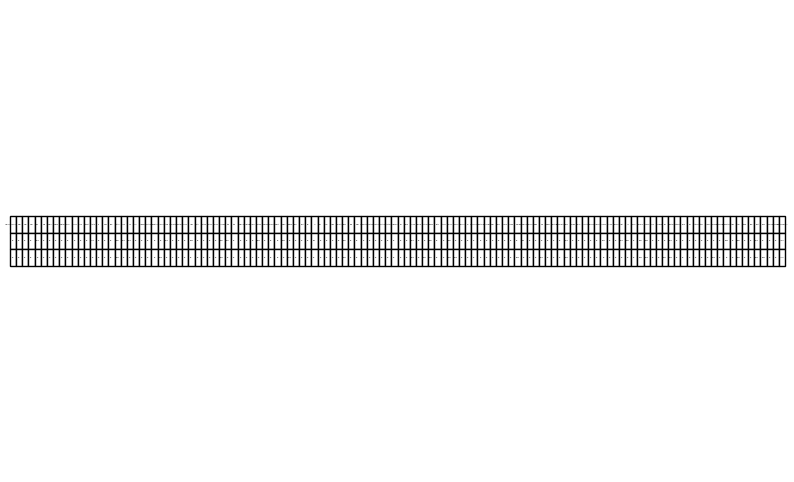

In [38]:
# Mengubah hasil perhitungan menjadi DataFrame
tfidf_df = pd.DataFrame(X_test_combined.toarray(), columns=feature_names_with_token)

# Memformat nilai dengan 3 angka desimal
tfidf_df_formatted = tfidf_df.round(3)

# Membuat plot tabel
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

# Menampilkan hasil TF-IDF dalam bentuk tabel
table = ax.table(cellText=tfidf_df_formatted.values,
                 colLabels=tfidf_df_formatted.columns,
                 cellLoc='center',
                 loc='center')

# Menampilkan plot tabel
plt.show()

c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


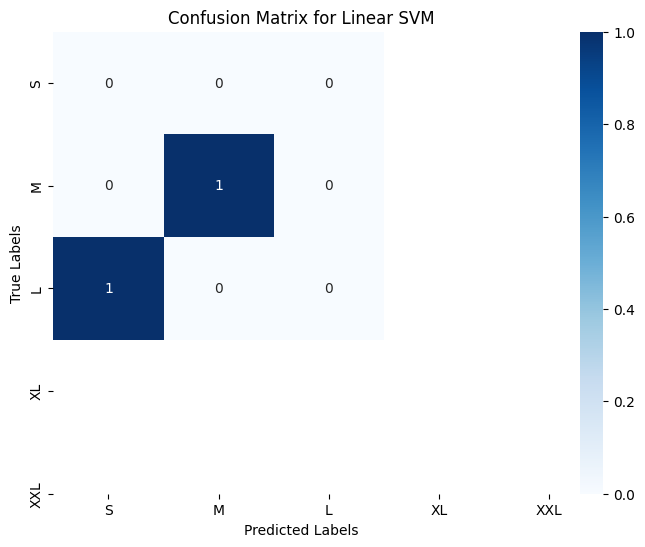

c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


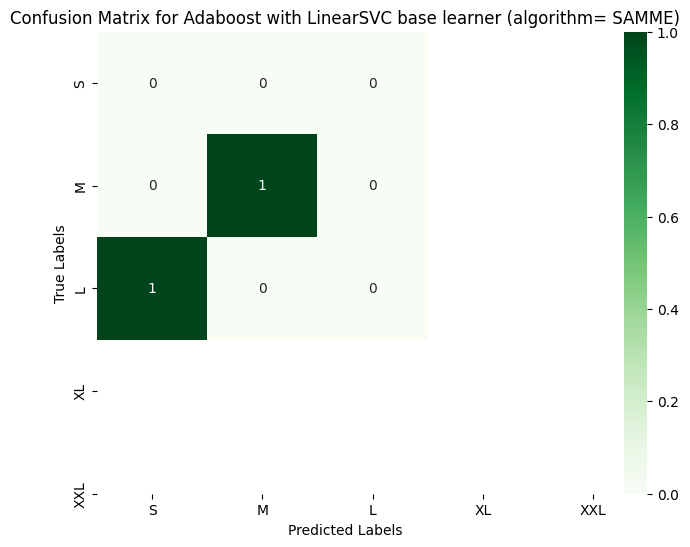

In [43]:
# Model menggunakan LinearSVC
svm_model = LinearSVC()  
svm_model.fit(X_train_combined, train_y)
y_pred_svm = svm_model.predict(X_test_combined)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(test_y, y_pred_svm)

# Plotting the heatmap for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["S", "M", "L", "XL", "XXL"], yticklabels=["S", "M", "L", "XL", "XXL"])
plt.title('Confusion Matrix for Linear SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model menggunakan Adaboost dengan pengaturan algorithm='SAMME'
adaboost_model = AdaBoostClassifier(base_estimator=LinearSVC(), n_estimators=50, algorithm='SAMME', random_state=42)
adaboost_model.fit(X_train_combined, train_y)
y_pred_adaboost = adaboost_model.predict(X_test_combined)

# Confusion Matrix for Adaboost
conf_matrix_adaboost = confusion_matrix(test_y, y_pred_adaboost)

# Plotting the heatmap for Adaboost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Greens", xticklabels=["S", "M", "L", "XL", "XXL"], yticklabels=["S", "M", "L", "XL", "XXL"])
plt.title('Confusion Matrix for Adaboost with LinearSVC base learner (algorithm= SAMME)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

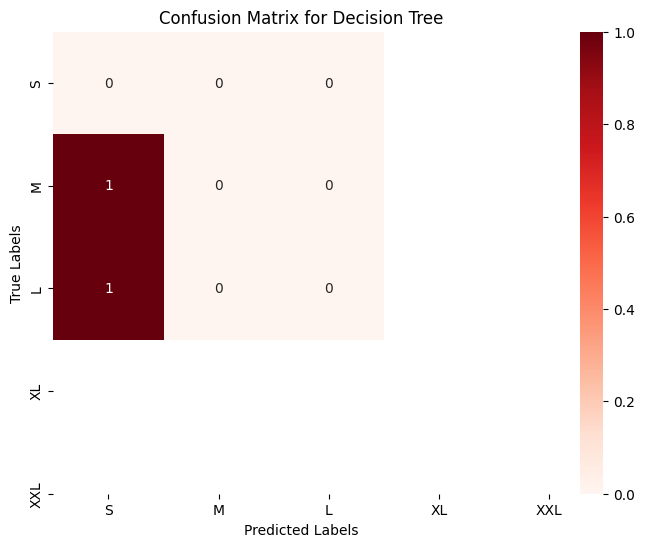

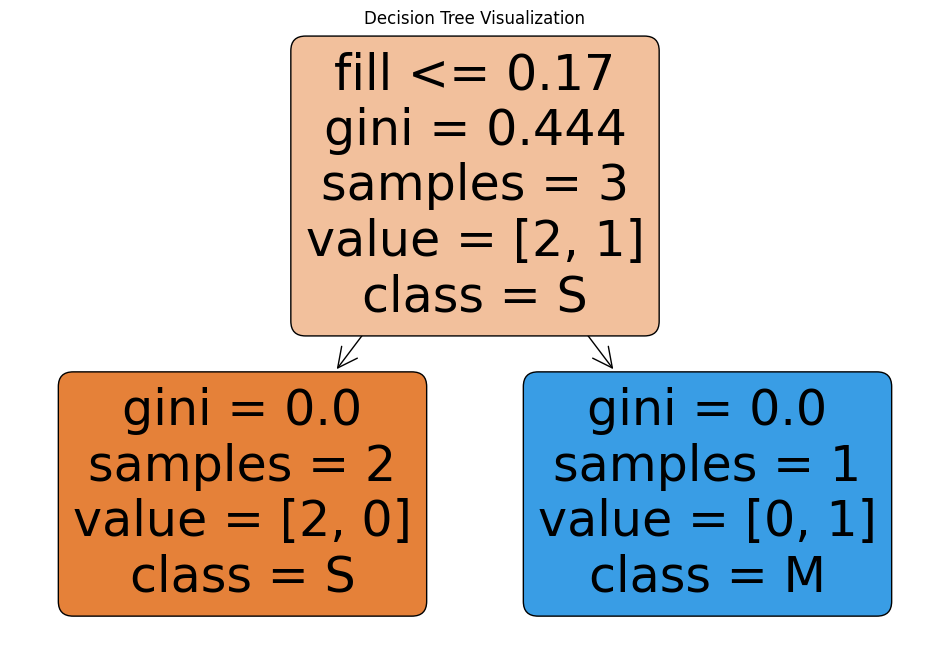

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Model menggunakan Decision Tree

decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)  # Sesuaikan nilai max_depth sesuai kebutuhan

decision_tree_model.fit(X_train_combined, train_y)
y_pred_decision_tree = decision_tree_model.predict(X_test_combined)

# Confusion Matrix for Decision Tree
conf_matrix_decision_tree = confusion_matrix(test_y, y_pred_decision_tree)

# Plotting the heatmap for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt="d", cmap="Reds", xticklabels=["S", "M", "L", "XL", "XXL"], yticklabels=["S", "M", "L", "XL", "XXL"])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




# Menyimpan decision tree ke dalam gambar dengan resolusi 300 PPI
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=feature_names_with_token, class_names=["S", "M", "L", "XL", "XXL"], filled=True, rounded=True)
plt.title('Decision Tree Visualization')

# Mengganti 'nama_gambar.png' dengan nama file yang diinginkan
plt.savefig('nama_gambar.png', dpi=300)

# Menampilkan plot decision tree
plt.show()




In [33]:
# Konversi sparse matrix menjadi matriks biasa
dense_matrix = X_test_combined.todense()


# Menggabungkan hasil menjadi DataFrame
combined_df = pd.DataFrame(dense_matrix, columns=feature_names_with_token)

# Menampilkan hasil DataFrame
combined_df

ValueError: Shape of passed values is (2, 106), indices imply (2, 97)